In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stock = 'AAPL'
data = yf.download(stock,'2022-01-01','2023-03-1')

[*********************100%***********************]  1 of 1 completed


# MACD

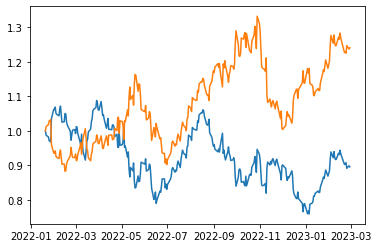

In [3]:
short_ma = 5
long_ma =12
fee = 0.0005

#techinal analysis signals
data['MA'+str(short_ma)] = data['Close'].rolling(short_ma).mean()
data['MA'+str(long_ma)] = data['Close'].rolling(long_ma).mean()
data['returns'] = data['Close'].pct_change()
start = long_ma

#+1 for buy, 0 for hold, -1 for sell
data['signal'] = 2*(data['MA'+str(short_ma)] > data['MA'+str(long_ma)]) -1

BnH_return = np.array(data['returns'][start+1:])
MACD_return = np.array(data['returns'][start+1:])*np.array(data['signal'][start:-1]) \
- fee * abs(np.array(data['signal'][start+1:]) - np.array(data['signal'][start:-1]))
BnH = np.prod(1 + BnH_return)**(252/len(BnH_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
MACD = np.prod(1 + MACD_return)**(252/len(MACD_return)) - 1
MACD_risk = np.std(MACD_return)*(252)**(1/2)

plt.plot(data['returns'][start:].index, np.append(1,np.cumprod(1+BnH_return)))
plt.plot(data['returns'][start:].index, np.append(1,np.cumprod(1+MACD_return)))

# RSI

In [4]:
stock = 'AAPL'
data = yf.download(stock,'2022-01-01','2023-03-1')

[*********************100%***********************]  1 of 1 completed


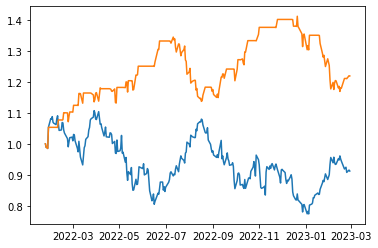

In [5]:
rsi_period = 14
rsi_oversold = 35
rsi_overbought = 65
fee = 0.0005
data['returns'] = data['Close'].pct_change()
data['Up'] = np.maximum(data['Close'].diff(),0)
data['Down'] = np.maximum(-data['Close'].diff(),0)
data['RS'] = data['Up'].rolling(rsi_period).mean()/data['Down'].rolling(rsi_period).mean()
data['RSI'] = 100 - 100/(1+ data['RS'])
start = rsi_period
data['signal'] = 1 * (data['RSI'] < rsi_oversold) - 1 * (data['RSI'] > rsi_overbought)
BnH_return = np.array(data['returns'][start+1:])
RSI_return = np.array(data['returns'][start+1:])\
    * np.array(data['signal'][start:-1])\
    -fee * abs(np.array(data['signal'][start+1:]) - np.array(data['signal'][start:-1]))

BnH = np.prod(1 + BnH_return)**(252/len(BnH_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
RSI = np.prod(1 + RSI_return)**(252/len(RSI_return)) - 1
RSI_risk = np.std(RSI_return)*(252)**(1/2)

plt.plot(data['returns'][start:].index, np.append(1,np.cumprod(1+BnH_return)))
plt.plot(data['returns'][start:].index, np.append(1,np.cumprod(1+RSI_return)))

# Support Resistance

In [6]:
stock = 'AAPL'
data = yf.download(stock,'2022-01-01','2023-03-1')

[*********************100%***********************]  1 of 1 completed


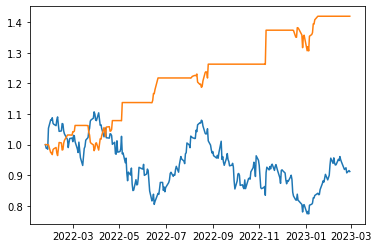

In [7]:
fee = 0.0005
sr_sell = 0.65
sr_buy = 0.35
data['returns'] = data['Close'].pct_change()
data['scaled price'] = data['Close']/10**np.floor(np.log10(data['Close']))
data['S&R'] = data['scaled price']%1
data['signal'] = 1*(data['S&R'] < sr_buy)-1*(data['S&R'] > sr_sell)

BnH_return = np.array(data['returns'][start+1:])
SR_return = np.array(data['returns'][start+1:])\
    * np.array(data['signal'][start:-1])\
    -fee * abs(np.array(data['signal'][start+1:]) - np.array(data['signal'][start:-1]))

BnH = np.prod(1 + BnH_return)**(252/len(BnH_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
SR = np.prod(1 + SR_return)**(252/len(SR_return)) - 1
SR_risk = np.std(SR_return)*(252)**(1/2)

plt.plot(data['returns'][start:].index, np.append(1,np.cumprod(1+BnH_return)))
plt.plot(data['returns'][start:].index, np.append(1,np.cumprod(1+SR_return)))

# Bollinger bands

# Statistical arbitrage